## 1.1 Import Python Libraries

In [31]:
import os, sagemaker, subprocess, boto3
from datetime import datetime
from sagemaker import s3
from sagemaker import get_execution_role
from sagemaker.pytorch import PyTorchModel
from sagemaker.deserializers import JSONDeserializer

## 1.2 Install Ultralytics for YOLOv8 model

There are following models to choose from:
1. Object Detection:
    - yolov8l.pt
    - yolov8m.pt
    - yolov8n.pt
    - yolov8s.pt
    - yolov8x.pt
    - yolov8x6.pt
2. Segmentation:
    - yolov8l-seg.pt
    - yolov8m-seg.pt
    - yolov8n-seg.pt
    - yolov8s-seg.pt
    - yolov8x-seg.pt
3. Classification:
    - yolov8l-cls.pt
    - yolov8m-cls.pt
    - yolov8n-cls.pt
    - yolov8s-cls.pt
    - yolov8x-cls.pt
4. Pose:
    - yolov8n-pose.pt
    - yolov8s-pose.pt
    - yolov8m-pose.pt
    - yolov8l-pose.pt
    - yolov8x-pose.pt
    - yolov8x-pose-p6.pt

For further information, check the link: https://docs.ultralytics.com

In [32]:
!pip3 install ultralytics

In [38]:

from ultralytics import YOLO

## Choose a model:
#model_name = 'yolov8l.pt'
model_name = 'yolo11n.pt'

YOLO(model_name)

bashCommand = f"tar -cpzf  model.tar.gz {model_name} code/"
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
output, error = process.communicate()

100%|██████████| 5.35M/5.35M [00:00<00:00, 220MB/s]


requirements: Ultralytics requirement ['lap>=0.5.12'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 188.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 1.0s, installed 1 package: ['lap>=0.5.12']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()
The DISPLAY environment variable isn't set.


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (fra

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'person'}
 obb: None
 orig_img: array([[[112, 101, 119],
         [112, 101, 119],
         [112, 101, 119],
         ...,
         [200, 191, 202],
         [200, 191, 202],
         [200, 191, 202]],
 
        [[112, 101, 119],
         [112, 101, 119],
         [112, 101, 119],
         ...,
         [200, 191, 202],
         [200, 191, 202],
         [200, 191, 202]],
 
        [[112, 101, 119],
         [112, 101, 119],
         [112, 101, 119],
         ...,
         [200, 191, 202],
         [200, 191, 202],
         [200, 191, 202]],
 
        ...,
 
        [[  6,   7,  17],
         [  6,   7,  17],
         [  7,   8,  18],
         ...,
         [104, 124, 160],
         [106, 126, 162],
         [106, 126, 162]],
 
        [[  7,   8,  18],
         [  7,   8,  18],
         [  8,   9,


image 1/1 /home/ec2-user/SageMaker/host-yolov8-on-sagemaker-endpoint/sm-notebook/samples2.png: 640x384 1 person, 61.3ms
Speed: 1.6ms preprocess, 61.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)


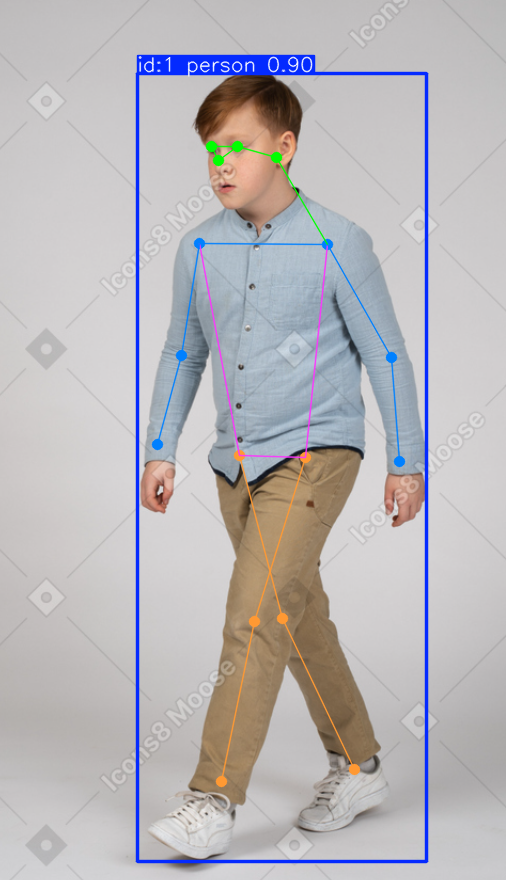

In [71]:
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk

In [73]:
keypoints

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9954, 0.9925, 0.9155, 0.9820, 0.3178, 0.9996, 0.9991, 0.9978, 0.9906, 0.9970, 0.9884, 0.9999, 0.9999, 0.9998, 0.9997, 0.9941, 0.9940]])
data: tensor([[[2.1872e+02, 1.6034e+02, 9.9542e-01],
         [2.3759e+02, 1.4699e+02, 9.9255e-01],
         [2.1170e+02, 1.4605e+02, 9.1549e-01],
         [2.7665e+02, 1.5786e+02, 9.8202e-01],
         [0.0000e+00, 0.0000e+00, 3.1785e-01],
         [3.2701e+02, 2.4437e+02, 9.9960e-01],
         [1.9967e+02, 2.4379e+02, 9.9908e-01],
         [3.9167e+02, 3.5757e+02, 9.9780e-01],
         [1.8127e+02, 3.5510e+02, 9.9057e-01],
         [3.9969e+02, 4.6108e+02, 9.9702e-01],
         [1.5721e+02, 4.4492e+02, 9.8838e-01],
         [3.0507e+02, 4.5799e+02, 9.9993e-01],
         [2.3998e+02, 4.5543e+02, 9.9990e-01],
         [2.5448e+02, 6.2152e+02, 9.9978e-01],
         [2.8277e+02, 6.1845e+02, 9.9970e-01],
         [2.2160e+02, 7.8157e+02, 9.9411e-01],
         [3.5478e+02, 7.699

## 1.3 Zip the code and model into `model.tar.gz` and upload it to specific S3 bucket
Here permission is granted to the S3 bucket created with CDK and not any other bucket

In [39]:
s3_client = boto3.client('s3')
response = s3_client.list_buckets()
for bucket in response['Buckets']:
    if 'yolov8' in bucket["Name"]:
        bucket = 's3://' + bucket["Name"]
        break

print(f'Bucket: {bucket}')
sess = sagemaker.Session(default_bucket=bucket.split('s3://')[-1])

prefix = "yolo11/demo-custom-endpoint"

Bucket: s3://yolov8sagemakerstack-yolov8s3acef217c-0h4olsz7ojhx


In [40]:
sm_client = boto3.client(service_name="sagemaker")
runtime_sm_client = boto3.client(service_name="sagemaker-runtime")

account_id = boto3.client("sts").get_caller_identity()["Account"]
region = boto3.Session().region_name

role = get_execution_role()
print(f'Role: {role}')

model_data = s3.S3Uploader.upload("model.tar.gz", bucket + "/" + prefix)
print(f'Model Data: {model_data}')

Role: arn:aws:iam::615299776985:role/YOLOv8SageMakerStack-yolov8notebookAccessRoleB15F59-WNQZBUzPuU5C
Model Data: s3://yolov8sagemakerstack-yolov8s3acef217c-0h4olsz7ojhx/yolo11/demo-custom-endpoint/model.tar.gz


## 1.4 Create the SageMaker PyTorchModel

In [41]:
model = PyTorchModel(entry_point='inference.py',
                     model_data=model_data, 
                     framework_version='1.12', 
                     py_version='py38',
                     role=role,
                     env={'TS_MAX_RESPONSE_SIZE':'20000000', 'YOLO11_MODEL': model_name},
                     sagemaker_session=sess)

## 1.5 Deploy the model on SageMaker Endpoint:

In [42]:
INSTANCE_TYPE = 'ml.m5.4xlarge'
ENDPOINT_NAME = 'yolo11-pytorch-' + str(datetime.utcnow().strftime('%Y-%m-%d-%H-%M-%S-%f'))

# Store the endpoint name in the history to be accessed by 2_TestEndpoint.ipynb notebook
%store ENDPOINT_NAME
print(f'Endpoint Name: {ENDPOINT_NAME}')

predictor = model.deploy(initial_instance_count=1, 
                         instance_type=INSTANCE_TYPE,
                         deserializer=JSONDeserializer(),
                         endpoint_name=ENDPOINT_NAME)

Stored 'ENDPOINT_NAME' (str)
Endpoint Name: yolo11-pytorch-2025-02-05-05-07-32-417897


[02/05/25 05:07:32] INFO     Repacking model artifact                                                  ]8;id=670713;file:///home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/sagemaker/model.py\model.py]8;;\:]8;id=671945;file:///home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/sagemaker/model.py#819\819]8;;\
                             (s3://yolov8sagemakerstack-yolov8s3acef217c-0h4olsz7ojhx/yolo11/demo-cust             
                             om-endpoint/model.tar.gz), script artifact (None), and dependencies ([])              
                             into single tar.gz file located at                                                    
                             s3://yolov8sagemakerstack-yolov8s3acef217c-0h4olsz7ojhx/pytorch-inference             
                             -2025-02-05-05-07-32-437/model.tar.gz. This may take some time depending              
                             on model size...                                                                      

[02/05/25 05:07:33] INFO     Creating model with name: pytorch-inference-2025-02-05-05-07-33-101    ]8;id=415411;file:///home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=95333;file:///home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/sagemaker/session.py#4094\4094]8;;\

                    INFO     Creating endpoint-config with name                                     ]8;id=924405;file:///home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=104440;file:///home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/sagemaker/session.py#5889\5889]8;;\
                             yolo11-pytorch-2025-02-05-05-07-32-417897                                             

[02/05/25 05:07:34] INFO     Creating endpoint with name yolo11-pytorch-2025-02-05-05-07-32-417897  ]8;id=224424;file:///home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=221419;file:///home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/sagemaker/session.py#4711\4711]8;;\

------!